In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Preprocess images and introduce random noise
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train_noisy = x_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [ ]:
# Define autoencoder architecture
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 137s 290ms/step - loss: 0.1131 - val_loss: 0.1140
Epoch 2/10
469/469 [==============================] - 137s 292ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
469/469 [==============================] - 129s 274ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
469/469 [==============================] - 125s 267ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/10
469/469 [==============================] - 124s 264ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
469/469 [==============================] - 127s 270ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 [==============================] - 126s 268ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
469/469 [==============================] - 129s 275ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
469/469 [==============================] - 127s 271ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/10
469/469 [==============================] - 128s 273m

In [ ]:
# Evaluate the model
evaluation = autoencoder.evaluate(x_test_noisy, x_test)
print("Evaluation Loss:", evaluation)

313/313 [==============================] - 7s 21ms/step - loss: 0.1140
Evaluation Loss: 0.11395808309316635


313/313 [==============================] - 6s 18ms/step


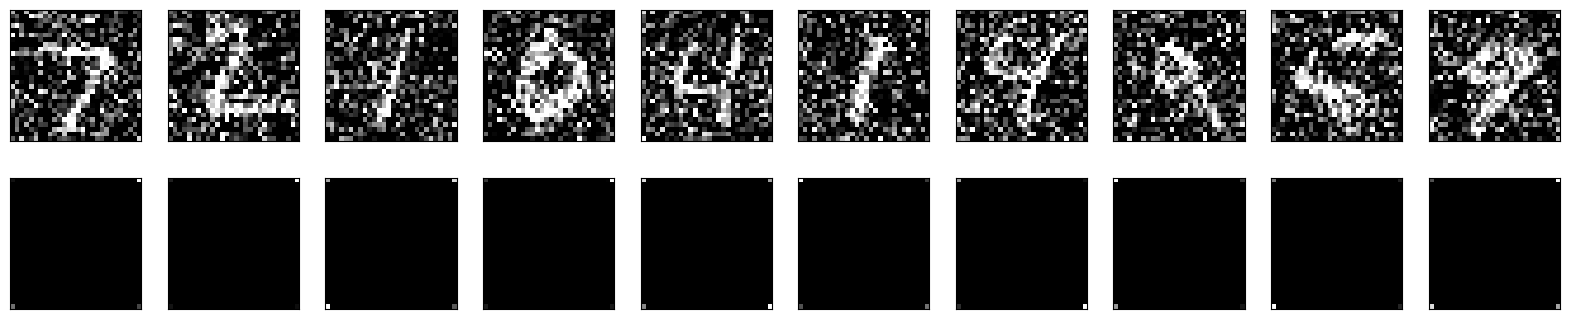

In [ ]:
# Visualize some reconstructed images
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()